https://www.kaggle.com/swapniljena/disease-prediction-random-forest-100-acc

https://www.analyticsvidhya.com/blog/2020/03/pivot-table-pandas-python/

https://www.machinelearningplus.com/pandas/pandas-pivot-table-in-python/

https://www.geeksforgeeks.org/python-pandas-pivot_table/

https://www.examplefiles.net/cs/529361

In [1]:
import numpy as np
import pandas as pd 
import pandas as pd
import os
import pickle
import category_encoders as ce
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df_symptom = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/disease prediction/dataset.csv')

In [3]:
df_symptom.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_symptom['Disease'].nunique()

41

In [5]:
df_description = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/disease prediction/symptom_Description.csv')

In [6]:
df_description.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [7]:
df_precaution = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/disease prediction/symptom_precaution.csv')

In [8]:
df_precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [9]:
df_severity = pd.read_csv('C:/Users/mwamb/Desktop/Desktop/disease prediction/Symptom-severity.csv')

In [10]:
df_severity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [11]:
len(df_symptom['Disease'].unique())


41

In [12]:
# get a list like this --> ['Symptom_1', Symptom_2, ..., Symptom_17 ]
cols = [i for i in df_symptom.iloc[:,1:].columns]
cols

['Symptom_1',
 'Symptom_2',
 'Symptom_3',
 'Symptom_4',
 'Symptom_5',
 'Symptom_6',
 'Symptom_7',
 'Symptom_8',
 'Symptom_9',
 'Symptom_10',
 'Symptom_11',
 'Symptom_12',
 'Symptom_13',
 'Symptom_14',
 'Symptom_15',
 'Symptom_16',
 'Symptom_17']

#### One Hot Encoding


https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

https://www.datacamp.com/community/tutorials/categorical-data

In [13]:
df_symptom_encoded_data = pd.get_dummies(df_symptom, columns = ['Symptom_1',
 'Symptom_2',
 'Symptom_3',
 'Symptom_4',
 'Symptom_5',
 'Symptom_6',
 'Symptom_7',
 'Symptom_8',
 'Symptom_9',
 'Symptom_10',
 'Symptom_11',
 'Symptom_12',
 'Symptom_13',
 'Symptom_14',
 'Symptom_15',
 'Symptom_16',
 'Symptom_17'])
print(df_symptom_encoded_data)

                                      Disease  Symptom_1_ acidity  \
0                            Fungal infection                   0   
1                            Fungal infection                   0   
2                            Fungal infection                   0   
3                            Fungal infection                   0   
4                            Fungal infection                   0   
...                                       ...                 ...   
4915  (vertigo) Paroymsal  Positional Vertigo                   0   
4916                                     Acne                   0   
4917                  Urinary tract infection                   0   
4918                                Psoriasis                   0   
4919                                 Impetigo                   0   

      Symptom_1_ back_pain  Symptom_1_ bladder_discomfort  \
0                        0                              0   
1                        0                       

In [14]:
df_symptom_encoded_data.head()

,Disease,Symptom_1_ acidity,Symptom_1_ back_pain,Symptom_1_ bladder_discomfort,Symptom_1_ breathlessness,Symptom_1_ burning_micturition,Symptom_1_ chest_pain,Symptom_1_ chills,Symptom_1_ constipation,Symptom_1_ continuous_sneezing,...,Symptom_14_ congestion,Symptom_14_ phlegm,Symptom_14_ red_spots_over_body,Symptom_15_ blood_in_sputum,Symptom_15_ chest_pain,Symptom_15_ loss_of_smell,Symptom_16_ blood_in_sputum,Symptom_16_ loss_of_smell,Symptom_16_ muscle_pain,Symptom_17_ muscle_pain
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
for col in df_symptom_encoded_data.columns:
    print(col)

Disease
Symptom_1_ acidity
Symptom_1_ back_pain
Symptom_1_ bladder_discomfort
Symptom_1_ breathlessness
Symptom_1_ burning_micturition
Symptom_1_ chest_pain
Symptom_1_ chills
Symptom_1_ constipation
Symptom_1_ continuous_sneezing
Symptom_1_ cough
Symptom_1_ cramps
Symptom_1_ fatigue
Symptom_1_ headache
Symptom_1_ high_fever
Symptom_1_ indigestion
Symptom_1_ joint_pain
Symptom_1_ mood_swings
Symptom_1_ muscle_wasting
Symptom_1_ muscle_weakness
Symptom_1_ neck_pain
Symptom_1_ pain_during_bowel_movements
Symptom_1_ patches_in_throat
Symptom_1_ pus_filled_pimples
Symptom_1_ shivering
Symptom_1_ skin_rash
Symptom_1_ stiff_neck
Symptom_1_ stomach_pain
Symptom_1_ sunken_eyes
Symptom_1_ vomiting
Symptom_1_ weakness_in_limbs
Symptom_1_ weight_gain
Symptom_1_ weight_loss
Symptom_1_ yellowish_skin
Symptom_1_itching
Symptom_2_ abdominal_pain
Symptom_2_ acidity
Symptom_2_ anxiety
Symptom_2_ blackheads
Symptom_2_ bladder_discomfort
Symptom_2_ blister
Symptom_2_ breathlessness
Symptom_2_ bruising
Sym

In [ ]:
df_symptom_encoded_data.head()

####  Prepare Input Data for Deep Learning 


Perform the following steps for preparing data   

. Load data into a pandas dataframe   
. Convert the dataframe to a numpy array   
. Scale the feature dataset   
. Use one-hot-encoding for the target variable   
. Split into training and test datasets   

In [16]:
df_symptom_encoded_data.shape


(4920, 395)

In [17]:
df_symptom_encoded_data.head()

,Disease,Symptom_1_ acidity,Symptom_1_ back_pain,Symptom_1_ bladder_discomfort,Symptom_1_ breathlessness,Symptom_1_ burning_micturition,Symptom_1_ chest_pain,Symptom_1_ chills,Symptom_1_ constipation,Symptom_1_ continuous_sneezing,...,Symptom_14_ congestion,Symptom_14_ phlegm,Symptom_14_ red_spots_over_body,Symptom_15_ blood_in_sputum,Symptom_15_ chest_pain,Symptom_15_ loss_of_smell,Symptom_16_ blood_in_sputum,Symptom_16_ loss_of_smell,Symptom_16_ muscle_pain,Symptom_17_ muscle_pain
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# shift column 'Name' to first position
first_column = df_symptom_encoded_data.pop('Disease')
  
# insert column using insert(position,column_name,
# first_column) function
df_symptom_encoded_data.insert(394, 'Disease', first_column)

In [19]:
df_symptom_encoded_data.head()

,Symptom_1_ acidity,Symptom_1_ back_pain,Symptom_1_ bladder_discomfort,Symptom_1_ breathlessness,Symptom_1_ burning_micturition,Symptom_1_ chest_pain,Symptom_1_ chills,Symptom_1_ constipation,Symptom_1_ continuous_sneezing,Symptom_1_ cough,...,Symptom_14_ phlegm,Symptom_14_ red_spots_over_body,Symptom_15_ blood_in_sputum,Symptom_15_ chest_pain,Symptom_15_ loss_of_smell,Symptom_16_ blood_in_sputum,Symptom_16_ loss_of_smell,Symptom_16_ muscle_pain,Symptom_17_ muscle_pain,Disease
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [20]:
#Use a Label encoder to convert String to numeric values 
#for the target variable

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_symptom_encoded_data['Disease'] = label_encoder.fit_transform(df_symptom_encoded_data['Disease'])


In [21]:
#Convert input to numpy array
np_df = df_symptom_encoded_data.to_numpy()



In [22]:
#Separate feature and target variables

X_data = np_df[:,0:394]
Y_data=np_df[:,394]

In [23]:
print("\nFeatures before scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget before scaling :\n------------------------------------")
print(Y_data[:5])


Features before scaling :
------------------------------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Target before scaling :
------------------------------------
[15 15 15 15 15]


In [24]:
#Create a scaler model that is fit on the input data.
scaler = StandardScaler().fit(X_data)

#Scale the numeric feature variables
X_data = scaler.transform(X_data)

#Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data,41)

In [25]:
print("\nFeatures after scaling :\n------------------------------------")
print(X_data[:5,:])
print("\nTarget after one-hot-encoding :\n------------------------------------")
print(Y_data[:5,:])



Features after scaling :
------------------------------------
[[-0.15811388 -0.14981285 -0.04944682 ... -0.12186667 -0.09925833
  -0.12186667]
 [-0.15811388 -0.14981285 -0.04944682 ... -0.12186667 -0.09925833
  -0.12186667]
 [-0.15811388 -0.14981285 -0.04944682 ... -0.12186667 -0.09925833
  -0.12186667]
 [-0.15811388 -0.14981285 -0.04944682 ... -0.12186667 -0.09925833
  -0.12186667]
 [-0.15811388 -0.14981285 -0.04944682 ... -0.12186667 -0.09925833
  -0.12186667]]

Target after one-hot-encoding :
------------------------------------
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0

In [26]:
#Split training and test data
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Train Test Dimensions:
------------------------------------
(4428, 394) (4428, 41) (492, 394) (492, 41)


#### Creating a Model   

Creating a model in Keras requires defining the following   

. Number of hidden layers   
. Number of nodes in each layer    
. Activation functions    
. Loss Function & Accuracy measurements   

In [29]:
from tensorflow import keras

#Number of classes in the target variable
NB_CLASSES=41

#Create a sequencial model in Keras
model = tf.keras.models.Sequential()

#Add the first hidden layer
model.add(keras.layers.Dense(128,                    #Number of nodes
                             input_shape=(394,),       #Number of input variables
                              name='Hidden-Layer-1', #Logical name
                              activation='relu'))    #activation function

#Add a second hidden layer
model.add(keras.layers.Dense(128,
                              name='Hidden-Layer-2',
                              activation='relu'))

#Add an output layer with softmax activation
model.add(keras.layers.Dense(NB_CLASSES,
                             name='Output-Layer',
                             activation='softmax'))

#Compile the model with loss & metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

#Print the model meta-data
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               50560     
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 41)                5289      
                                                                 
Total params: 72,361
Trainable params: 72,361
Non-trainable params: 0
_________________________________________________________________


##### Training and evaluating the Model  

Training the model involves defining various training models and then perform forward and back propagation.


Training Progress:
------------------------------------
Epoch 1/3
1771/1771 [==============================] - 10s 5ms/step - loss: 0.2598 - accuracy: 0.9486 - val_loss: 1.2320e-06 - val_accuracy: 1.0000
Epoch 2/3
1771/1771 [==============================] - 7s 4ms/step - loss: 7.1633e-07 - accuracy: 1.0000 - val_loss: 8.0729e-10 - val_accuracy: 1.0000
Epoch 3/3
1771/1771 [==============================] - 9s 5ms/step - loss: 1.3462e-10 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000

Accuracy during Training :
------------------------------------


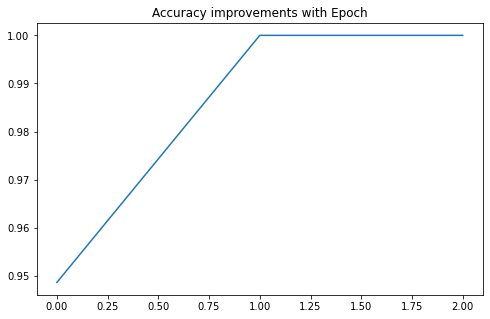


Evaluation against Test Dataset :
------------------------------------
16/16 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [30]:
#Make it verbose so we can see the progress
VERBOSE=1

#Setup Hyper Parameters for training

#Set Batch size
BATCH_SIZE=2
#Set number of epochs
EPOCHS=3
#Set validation split. 20% of the training data will be used for validation
#after each epoch
VALIDATION_SPLIT=0.2

print("\nTraining Progress:\n------------------------------------")

#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history=model.fit(X_train,
          Y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=VERBOSE,
          validation_split=VALIDATION_SPLIT)

print("\nAccuracy during Training :\n------------------------------------")
import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch.
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print results
print("\nEvaluation against Test Dataset :\n------------------------------------")
model.evaluate(X_test,Y_test)

##### Saving and Loading Models  

The training and inference environments are usually separate. Models need to be saved after they are validated. They are then loaded into the inference environments for actual prediction   

In [31]:
#Saving a model
    
model.save("disease_save")

 
    
#Loading a Model 
loaded_model = keras.models.load_model("disease_save")

#Print Model Summary
loaded_model.summary()

INFO:tensorflow:Assets written to: disease_save\assets


INFO:tensorflow:Assets written to: disease_save\assets


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               50560     
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 41)                5289      
                                                                 
Total params: 72,361
Trainable params: 72,361
Non-trainable params: 0
_________________________________________________________________


####  Predictions with Deep Learning Models

In [39]:
#Raw prediction data
prediction_input = [[0,1,1,0,1,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                    0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                    0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                    0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                    0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                    0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]]

#Scale prediction data with the same scaling model
scaled_input = scaler.transform(prediction_input)

#Get raw prediction probabilities
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

#Find prediction
prediction = np.argmax(raw_prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

Raw Prediction Output (Probabilities) : [[5.8427965e-03 1.1349435e-04 6.9035035e-05 2.8444372e-02 1.8458470e-03
  2.9064296e-03 5.1164918e-04 1.9432082e-05 2.8061222e-03 1.9111203e-04
  8.3420350e-04 1.0613883e-04 1.3404262e-04 3.0649104e-03 9.9042863e-06
  1.7162365e-05 5.2738972e-03 4.6778823e-06 3.4468358e-05 2.8518142e-02
  1.0833968e-03 2.7153055e-05 2.9159233e-04 2.2706126e-03 1.1765507e-02
  1.8213791e-04 8.1813532e-01 4.1259849e-04 7.5526827e-06 6.1722356e-03
  1.5893277e-02 7.3275514e-05 1.1394975e-06 6.7829061e-04 5.1343676e-02
  7.6107033e-05 1.6127301e-03 2.7309093e-04 8.2807206e-03 8.9556350e-05
  5.8221241e-04]]
Prediction is  ['Hypothyroidism']
